# Algoritmo geração GEOMETRIA de um par de engrenagens com mudança de perfil 

A geração da geometria pode ser dada por uma função $f(α,i,m,ha,c,k)$ ou quando $z_1$ é pré definido, descomenta-se a linha de $z_1=n$ e a função se modifica para $f(α,i,m,ha,c,z_1)$


end


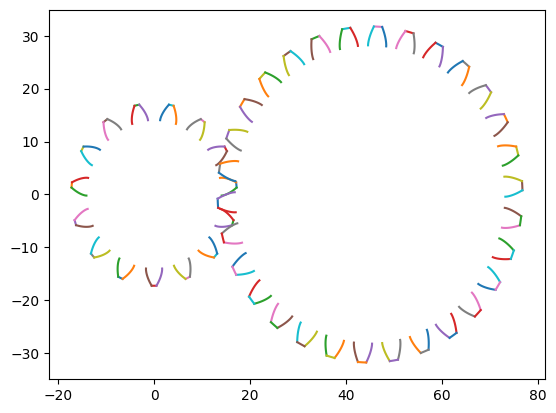

In [19]:
#---------------------------------INPUTS--------------------------------------------
# Sugestão: alterar, α, i ou m e verificar a nova configuração ideal de engrenagens 
α=20     # ângulo de pressão
i=2      # Fator de redução
m=2      # Módulo maior, maior resistência
ha = 1   # Coeficiente do adendo #5.2 Arnaudov
c = 0.25 # Coeficiente raio filete #5.2 Arnaudov
k=1      # dente de altura completa usar 1 e dente diminuido usar 0,8
#-----------------------------------END INPUTS--------------------------------------

# importing movie py libraries
import numpy as np
import matplotlib.pyplot as plt
# função da involuta
def inv (angulo):
    involuta=np.tan(angulo)-angulo
    return involuta
#-------------------------------------------------------------------------
α=α*np.pi/180
z1_min=2*k*(m+(m**2+(1+2*m)*np.sin(α)**2)**0.5)/((1+2*m)*(np.sin(α))**2)
Z_1=int(z1_min+1)
#Z_1=n # Substituir n pelo número de dentes desejado 
Z_2 = Z_1*i 
x1=1-0.5*Z_1*(np.sin(α))**2
x2=-x1 # Ver cap 5 Arnaudov
inv_αw12=2*np.tan(α)*(x1+x2)/(Z_1+Z_2)+inv(α) # (Equação 5.1 Arnaudov)
αw12 = 0 # Operating pressure angle (chute inicial para o método numérico)
while (np.tan(αw12)- αw12) <inv_αw12:
    αw12=αw12+0.0001
else:
    print("")
a12= m*(Z_1+Z_2)/2 #Reference center distance
aw12 = a12*np.cos(α)/np.cos(αw12)  # Operating center distance (Equação 5.2 Arnaudov)
y12 = 0.5*(Z_1+Z_2)*(np.cos(α)/np.cos(αw12)-1) # Gears shift coefficient (Equação 5.3 Arnaudov)
Δy12 = (x1+x2)-0.5*(Z_1+Z_2)*(np.cos(α)/np.cos(αw12)-1)# Return shift coefficient (tooth tip shortening coefficient) (Equação 5.4 Arnaudov)
ha1 = m*(ha+x1-Δy12) #Addendum  
ha2 = m*(ha+x2-Δy12) #Addendum
hf1 = m*(ha+x1+c) # dedendum
hf2 = m*(ha-x2+c) # dedendum
h1 = ha1+hf1 #height of teeth (Equação 5.6 Arnaudov)
h2 = ha2+hf2 #height of teeth (Equação 5.7 Arnaudov)

#--------------------------------------------------------------------------------------
NPR = 50 # NÚMERO DE PONTOS NA RETA TANGENTE AOS DOIS CIRCULOS BASE
NPC = 50 # NÚMERO DE PONTOS NA CURVA DAS CIRCUNFERÊNCIAS PRIMITIVA, DE BASE E EXTERNA
Nae = 50 # NÚMERO DE PONTOS NA CURVA DO PERFIL DO LADO DIREITO
Nbf = 50 # NÚMERO DE PONTOS NA CURVA DO PERFIL DO LADO ESQUERDO
Nbd = 20 # NÚMERO DE PONTOS DA CURVA DO RAIO DE FILETE
Nef = 20 # NÚMERO DE PONTOS NA CURVA DO PERFIL QUE FAZ PARTE DO DIÂMETRO EXTERNO
#-------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------
for Z in [Z_1,Z_2]:
    Dp = m*Z
    if Z==Z_1:
        Da = Dp+ 2*ha1        # Diâmetro do circulo do adendo
        Dr = Dp - 2*hf1       # Diâmetro do circulo do dedendo
    elif Z==Z_2:
        Da = Dp+2*ha2         # Diâmetro do circulo do adendo   
        Dr = Dp - 2*hf2       # Diâmetro do circulo do dedendo
    else:
        print("")
    Db = Dp*np.cos(α)
    Rp = Dp/2
    Ra = Da/2
    Rb = Db/2
    Rr = Dr/2
    β = np.pi/Z+2*inv(α)
    α_a = np.arccos(Db/Da)
    PIbr = (np.pi-β)/2
    PIbl = (np.pi+β)/2
    PI_F = PIbr + inv(α_a)
    PI_E = PIbl - inv(α_a)
    
    #Parte superior
    inc=np.linspace(0,Nef, Nef)*(PI_E-PI_F)/Nef
    i=np.linspace(0,Nef, Nef)
    th1=PI_F+inc

    #Lado direito perfil
    inc=np.linspace(0,Nae, Nae)*(α_a-0)/Nae
    i=np.linspace(0,Nae, Nae)
    th2=0+inc
    Rkl = Rb/np.cos(th2)           # Esse raio varia entre Rb e Rb/cos(α_a)
    PIkl = PIbl-(np.tan(th2)-th2)  # Esse ângulo varia entre [π/2+β/2] e [π/2+β/2-inv(α_a)]

    #Lado esquerdo perfil
    inc=np.linspace(0,Nbf, Nbf)*(α_a-0)/Nbf
    i=np.linspace(0,Nbf, Nbf)
    th3=0+inc
    Rkr = Rb/np.cos(th3)          # Esse raio varia entre Rb e Rb/cos(α_a)
    PIkr = PIbr+(np.tan(th3)-th3) # Esse ângulo varia entre [π/2-β/2] e [π/2-β/2+inv(α_a)]

    #raio de filete
    γ =np.pi/Z - β/2
    ro1 = (Rr**2+Rb**2-2*Rb*Rr*np.cos(γ))/(2*Rb*np.cos(γ)-2*Rr)
    PIo1 = PIbr - γ
    inc=np.linspace(0,Nbd, Nbd)*(PIbr-PIo1)/Nbd
    i=np.linspace(0,Nbd, Nbd)
    th4 = PIo1+inc
    OG = (Rr+ro1)*np.cos(th4-PIo1)-(((Rr+ro1)*np.cos(th4-PIo1))**2-Rr*(Rr+2*ro1))**0.5
    #x4 = OG*np.cos(th4)
    #y4 = OG*np.sin(th4)
    if Z==Z_1:
        Rb1=Rb
        Rp1=Rp
        Ra1=Ra
        Da1=Da
        th1_1=th1
        Rkl_1=Rkl
        PIkl_1=PIkl
        Rkr_1=Rkr
        PIkr_1=PIkr
        PI_F1=PI_F
    elif Z==Z_2:
        Rb2=Rb
        Rp2=Rp
        Ra2=Ra
        Da2=Da
        th1_2=th1
        Rkl_2=Rkl
        PIkl_2=PIkl
        Rkr_2=Rkr
        PIkr_2=PIkr
        PI_F2=PI_F
else:
    θ = np.linspace(0,2*np.pi , NPC) # partição angular para construir as circunferências
fig, axes = plt.subplots()
n=0
n2=0
while n<Z_1+Z_2:
    if n<Z_1:
        C=0
        δ = np.pi/2 - np.pi/(2*Z_1)
        Δ = 2*np.pi/Z_1
        xrb_1 = Rb1*np.cos(θ-δ)+C
        yrb_1 = Rb1*np.sin(θ-δ)
        xrp_1 = Rp1*np.cos(θ-δ)+C
        yrp_1 = Rp1*np.sin(θ-δ)
        xra_1 = Ra1*np.cos(θ-δ)+C
        yra_1 = Ra1*np.sin(θ-δ)
        x1_1 = Ra1*np.cos(th1_1+n*Δ-δ)+C
        y1_1 = Ra1*np.sin(th1_1+n*Δ-δ)
        x1_2 = Rkl_1*np.cos(PIkl_1+n*Δ-δ)+C
        y1_2 = Rkl_1*np.sin(PIkl_1+n*Δ-δ)
        x1_3 = Rkr_1*np.cos(PIkr_1+n*Δ-δ)+C
        y1_3 = Rkr_1*np.sin(PIkr_1+n*Δ-δ)
        # axes.set_ylim(-10,10)
        # axes.set_xlim(Rp1-15,Rp1+15)
        axes.plot(x1_1,y1_1,x1_2,y1_2,x1_3,y1_3)
    elif Z_1-1<n<Z_2+Z_1:
        n2=n2+1
        C=Rp1+Rp2
        Δ = 2*np.pi/Z_2
        δ = - np.pi/2 - np.pi/(2*Z_2)
        x = np.linspace(Rb1*np.cos(α),C-Rb2*np.cos(α) , NPR) # Domínio da função da reta tangente
        y=((-Rb2*np.sin(α)-Rb1*np.sin(α))/(C-Rb2*np.cos(α)-Rb1*np.cos(α)))*x+Rb1*np.sin(α)-((-Rb2*np.sin(α)-Rb1*np.sin(α))/(C-Rb2*np.cos(α)-Rb1*np.cos(α)))*Rb1*np.cos(α)
        xrb_2 = Rb2*np.cos(θ-δ)+C
        yrb_2 = Rb2*np.sin(θ-δ)
        xrp_2 = Rp2*np.cos(θ-δ)+C
        yrp_2 = Rp2*np.sin(θ-δ)
        xra_2 = Ra2*np.cos(θ-δ)+C
        yra_2 = Ra2*np.sin(θ-δ)
        x2_1 = Ra2*np.cos(th1_2+n*Δ-δ)+C
        y2_1 = Ra2*np.sin(th1_2+n*Δ-δ)
        x2_2 = Rkl_2*np.cos(PIkl_2+n2*Δ-δ)+C
        y2_2 = Rkl_2*np.sin(PIkl_2+n2*Δ-δ)
        x2_3 = Rkr_2*np.cos(PIkr_2+n2*Δ-δ)+C
        y2_3 = Rkr_2*np.sin(PIkr_2+n2*Δ-δ)
        #axes.set_ylim(-10,10)
        #axes.set_xlim(Rp1-15,Rp1+15)
        axes.plot(x2_1,y2_1,x2_2,y2_2,x2_3,y2_3)
    n=n+1
else:
    # Plot da reta tangente
    # axes.plot(x,y,color='b', label='Hidráulica',linestyle='dashed'),#marker='$-$',markersize=1,markeredgewidth=1.5)
    # returning mumpy image
    print("end")

### Resumo entradas e saídas necessárias para desenhar o protótipo em CAD

In [20]:
#---------------------------------INPUTS--------------------------------------------
# Sugestão: alterar, α, i ou m e verificar a nova configuração ideal de engrenagens 
α=20     # ângulo de pressão
i=2      # Fator de redução
m=2      # Módulo maior, maior resistência
ha = 1   # Coeficiente do adendo #5.2 Arnaudov
c = 0.25 # Coeficiente raio filete #5.2 Arnaudov
k=1      # dente de altura completa usar 1 e dente diminuido usar 0,8
#-----------------------------------END INPUTS--------------------------------------

#------------------------------------------- Cálculo Geometria --------------------------------------------
α=α*np.pi/180               # Conversão automática
r=0.38*m                    # Ver tooth profile geometry
z1_min=2*k*(m+(m**2+(1+2*m)*np.sin(α)**2)**0.5)/((1+2*m)*(np.sin(α))**2)
z1=int(z1_min+1)
#z1=8
x1=1-0.5*z1*(np.sin(α))**2
x2=-x1 # Ver cap 5 Arnaudov
z2=z1*i
inv_α=np.tan(α)-α
inv_αw12=2*np.tan(α)*(x1+x2)/(z1+z2)+inv_α # (Equação 5.1 Arnaudov)
αw12 = 0 # Operating pressure angle (chute inicial para o método numérico)
while (np.tan(αw12)- αw12) <inv_αw12:
    αw12=αw12+0.0001
    #print(αw12)
else:
    print("")
Δy12 = (x1+x2)-0.5*(z1+z2)*(np.cos(α)/np.cos(αw12)-1)# Return shift coefficient (tooth tip shortening coefficient) (Equação 5.4 Arnaudov)
ha1 = m*(ha+x1-Δy12) #Addendum  
ha2 = m*(ha+x2-Δy12) #Addendum
hf1 = m*(ha+x1+c) # dedendum
hf2 = m*(ha-x2+c) # dedendum
d1 = m*z1 #Reference circle diameters (Equação 5.8 Arnaudov)
d2 = m*z2 #Reference circle diameters (Equação 5.8 Arnaudov)
da1 = d1+ 2*ha1 #Tip circle diameters (Equação 5.9 Arnaudov)
da2 = d2+2*ha2 #Tip circle diameters (Equação 5.9 Arnaudov)
df1 = d1 - 2*hf1 #Root circle diameter (Equação 5.10 Arnaudov)
df2 = d2 - 2*hf2 #Root circle diameter (Equação 5.10 Arnaudov)
db1 = d1*np.cos(α)
db2 = d2*np.cos(α)
αa1=np.arccos(db1/da1) # Tip circle profile angle
αa2=np.arccos(db2/da2) # Tip circle profile angle
ψ1= np.pi/(2*z1)+2*x1*np.tan(α)/z1 #equação 2.73 Jelaska # ângulo entre o centro do dente até a involuta no ponto em que cruza o diâmetro primitivo
ψ2= np.pi/(2*z2)+2*x2*np.tan(α)/z2 #equação 2.73 Jelaska
print("SAÍDAS:")
print("inv(α):",inv(α)*180/np.pi,"deg")
print("ψ1:",180*ψ1/np.pi,"deg")
print("ψ2:",180*ψ2/np.pi,"deg")
print("inv(αa1):",inv(αa1)*180/np.pi,"deg")
print("inv(αa2):",inv(αa2)*180/np.pi,"deg")
print("d1:",d1,"mm","\ndb1:",db1,"mm","\ndf1:",df1,"mm","\nda1:",da1,"mm")
print("d2:",d2,"mm","\ndb2:",db2,"mm","\ndf2:",df2,"mm","\nda2:",da2,"mm")
print("r:",r,"mm")


SAÍDAS:
inv(α): 0.8539582918412502 deg
ψ1: 6.341078059574837 deg
ψ2: 2.8294609702125806 deg
inv(αa1): 5.209137070714542 deg
inv(αa2): 2.3014180768603967 deg
d1: 30 mm 
db1: 28.190778623577252 mm 
df1: 24.50933335321533 mm 
da1: 34.49178536261742 mm
d2: 60 mm 
db2: 56.381557247154504 mm 
df2: 54.509333353215325 mm 
da2: 63.51045206904808 mm
r: 0.76 mm
